## Problem Statement
    Build the linear regression model using scikit learn in boston data to predict
    'Price' based on other dependent variable.
    Here is the code to load the data:
    import numpy as np
    import pandas as pd
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    import sklearn
    from sklearn.datasets import load_boston
    boston = load_boston()
    bos = pd.DataFrame(boston.data)

    NOTE: The solution shared through Github should contain the
    source code used and the screenshot of the output.
    3. Output
    This assignment consists of 200 marks and has to be submitted in
    .ipynb/PDF

## Keypoints
    1. Load the dataset
    2. Check for the numerical and categorical columns
    3. Look for null values treatment if found
    4. Visualize the dataset for better data understanding
    5. Choose the algorithm
    6. Choose the evaluation metrics
    7. Done!

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns

In [2]:
boston = load_boston()
column_names = boston.feature_names
target = boston.target
data = pd.DataFrame(boston.data,columns=column_names)
data['MEDV'] = target

In [3]:
X = data.drop(['MEDV'], axis=1)
y = data['MEDV']

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

In [45]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [24]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Dataset doesn't contain any null values

In [5]:
# print(boston.DESCR)


In [6]:
data.shape

(506, 14)

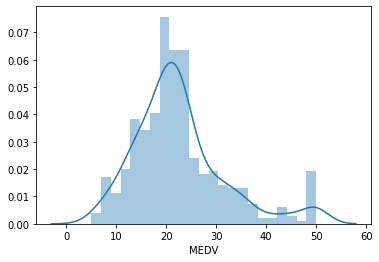

In [7]:
## Plotting distribution plot of target feature

sns.distplot(data['MEDV'])

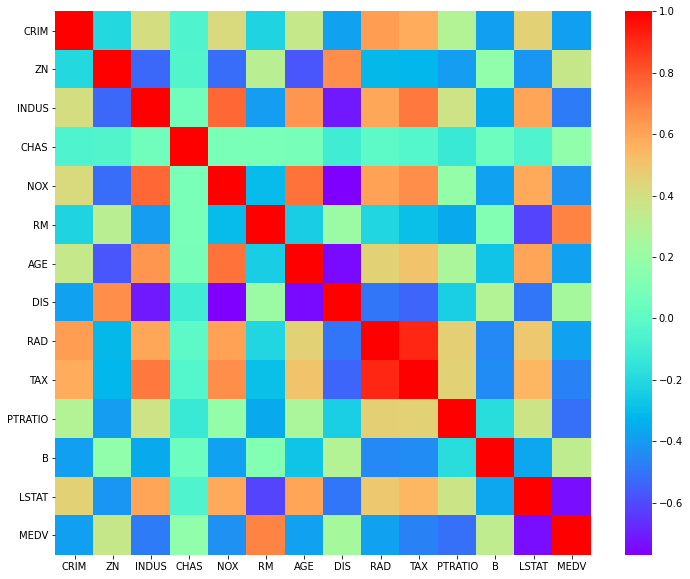

In [51]:
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(), cmap='rainbow')

In [8]:

# sns.pairplot(data)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
print(X_train.shape)
print(y_train.shape)

(354, 13)
(354,)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_mod = LinearRegression(normalize=True, n_jobs=10)

In [14]:
lin_mod.fit(X_train, y_train)

LinearRegression(n_jobs=10, normalize=True)

In [15]:
y_pred = lin_mod.predict(X_test)

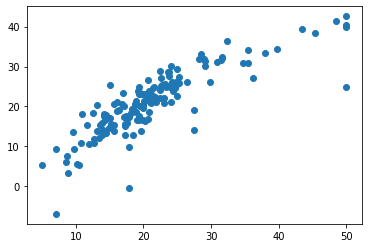

In [20]:
plt.scatter(y_test,y_pred)

In [28]:
lin_mod.score(X_train, y_train)

0.7434997532004697

In [21]:
lin_mod.score(X_test, y_test)

0.7112260057484934

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [29]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Sqaured Error: ", mse)

Mean Sqaured Error:  21.517444231177198


In [32]:
print("RMSE:",sqrt(mse))

RMSE: 4.63868992617282


####################################################################################################

In [33]:
from xgboost import XGBRFRegressor
xg_reg = XGBRFRegressor()

In [34]:
xg_reg.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [36]:
y_pred_xg = xg_reg.predict(X_test)

In [39]:
mse_xg = mean_squared_error(y_test, y_pred_xg)
print("Mean Sqaured Error: ", mse_xg)

Mean Sqaured Error:  10.004295731353823


In [40]:
print("RMSE:",sqrt(mse_xg))

RMSE: 3.1629568020056524


In [44]:
xg_reg.score(X_test, y_test)

0.8657377517990533